<a href="https://colab.research.google.com/github/jjon215/ML_HW3/blob/master/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-16 23:31:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  78.8MB/s    in 0.8s    

2019-04-16 23:31:09 (78.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step


In [0]:
conv_base.trainable = False

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 24s 235ms/step - loss: 0.6213 - acc: 0.6525 - val_loss: 0.5272 - val_acc: 0.7420
Epoch 2/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5265 - acc: 0.7440 - val_loss: 0.4203 - val_acc: 0.8140
Epoch 3/30
100/100 [==============================] - 19s 189ms/step - loss: 0.4749 - acc: 0.7800 - val_loss: 0.3884 - val_acc: 0.8310
Epoch 4/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4488 - acc: 0.7905 - val_loss: 0.3568 - val_acc: 0.8440
Epoch 5/30
100/100 [==============================] - 18s 181ms/step - loss: 0.4300 - acc: 0.8105 - val_loss: 0.3451 - val_acc: 0.8400
Epoch 6/30
100/100 [==============================] - 19s 194ms/step - loss: 0.4198 - acc: 0.8105 - val_loss: 0.3497 - val_acc: 0.8490
Epoch 7/30
100/100 [==============================] - 18s 

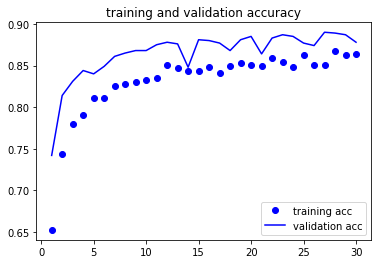

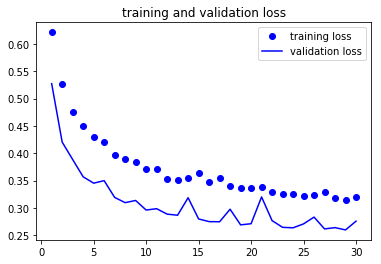

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 207ms/step - loss: 0.3373 - acc: 0.8440 - val_loss: 0.2424 - val_acc: 0.8970
Epoch 2/100
100/100 [==============================] - 19s 186ms/step - loss: 0.2888 - acc: 0.8790 - val_loss: 0.2389 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.2720 - acc: 0.8925 - val_loss: 0.2047 - val_acc: 0.9140
Epoch 4/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2383 - acc: 0.8990 - val_loss: 0.2155 - val_acc: 0.9120
Epoch 5/100
100/100 [==============================] - 19s 185ms/step - loss: 0.2040 - acc: 0.9205 - val_loss: 0.2723 - val_acc: 0.8970
Epoch 6/100
100/100 [==============================] - 18s 185ms/step - loss: 0.2232 - acc: 0.8980 - val_loss: 0.2807 - val_acc: 0.8990
Epoch 7/100
100/100 [==============================] - 19s 186ms/step - loss: 0.1841 - acc: 0.9260 - val_loss: 0.2321 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

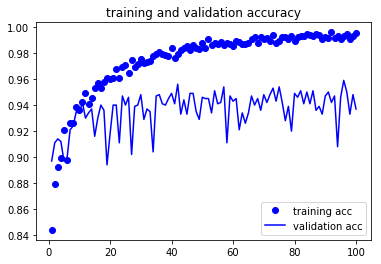

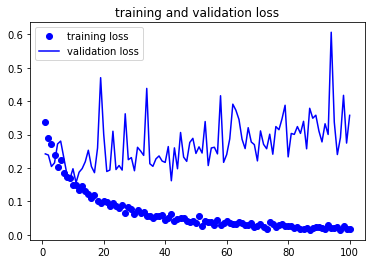

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: [0.24244084522128106, 0.2389088820666075, 0.20473613053560258, 0.21550736717879773, 0.27227805465459826, 0.28074007088318464, 0.23210954474285245, 0.18294781317934394, 0.16752739375457168, 0.19795036159455776, 0.15625871675089, 0.18756863191723824, 0.19850529052782803, 0.21893931981176137, 0.2532746235094965, 0.2046376599452924, 0.18619090211577713, 0.2602474535210058, 0.470429697483778, 0.3010789353679866, 0.18976864639669658, 0.1940144483372569, 0.3101909606344998, 0.1956000992306508, 0.20767129650339483, 0.1939284863229841, 0.3623783544776961, 0.22504874407895842, 0.23129201153526083, 0.19195508351782337, 0.2621137403184548, 0.251070873523131, 0.2379107531075715, 0.43837049340480005, 0.21303141995187616, 0.20517764182994142, 0.22754313418758101, 0.2362870550871594, 0.22104522112524136, 0.2169325852568727, 0.26429364133266064, 0.1619886251038406, 0.2604298284603283, 0.197983053564094, 0.306414996527019, 0.23277871411526577, 0.22007964532938787, 0.27665112614631654, 0